# Исследование рынка видеоигр

**Описание проекта**. Это исследование для интернет-магазина «Стримчик», который продаёт видеоигры по всему миру. Выявлены закономерности, определяющие успешность игры, на основе исторических данных из открытых источников. Сделаны рекомендации относительно потенциально популярных продуктов на основе анализа данных о продажах игр, оценок пользователей и экспертов, жанров и платформ. Выводы полезны для планирования рекламных кампаний.

Принципы планирования кампании на следующий год составлены на примере материалов на момент 2016 года при планировании кампании на 2017-ый.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
<br/>

Данные за 2016 год могут быть неполными.

## 1. Загрузка данных и изучение общей информации

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
# прочитаем данные 
games = pd.read_csv('C:/Users/alkon/practicum_projects/game_project/games.csv')

In [3]:
# напишем универсальную функцию, которая выведет основную информацию для знакомства с датафреймом
def general (data):
    
    # выведет информацию о датафрейме
    print('\033[1mИнформация о датафрейме:\033[0m')
    display(data.info())
    
    # выведет первые строки датафрейма
    print('\033[1mПервые строки датафрейма:\033[0m')
    display(data.head())
    
    # выведет числовое описание данных 
    print('\033[1mЧисловое описание данных:\033[0m')
    display(data.describe().round(2))
    
    # найдёт долю пропусков
    na_percent = data.isna().mean() * 100
    print('\033[1mДоля пропущенных значений:\033[0m')
    display(na_percent.round(2).astype(str) + '%')
    
    # выявит количество явных дубликатов
    duplicates = data.duplicated().sum()
    if duplicates > 0:
        print('\033[1mКоличество явных дубликатов:\033[0m', duplicates)
    else:
        print('\033[1mЯвные дубликаты не обнаружены.\033[0m')

In [4]:
# применим функцию к нашему датафрейму
general(games)

Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Первые строки датафрейма:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Числовое описание данных:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


Доля пропущенных значений:


Name                0.01%
Platform             0.0%
Year_of_Release     1.61%
Genre               0.01%
NA_sales             0.0%
EU_sales             0.0%
JP_sales             0.0%
Other_sales          0.0%
Critic_Score       51.32%
User_Score         40.09%
Rating             40.48%
dtype: object

Явные дубликаты не обнаружены.


Датафрейм содержит 16 715 наблюдений в период с 1980 года до 2016-ого. В нескольких столбцах присутствует значительная доля пропущенных значений до 40-50%, их нельзя будет просто удалить, поэтому ниже примем решение о способе обработки. В остальных столбцах доля незначительная до 1-2% и их удаление не повлияет на результаты исследования. Тип данных столбца `Year_of_Release` нужно будет перевести из строки в число (*int*), а тип данных *object* в `User_Score` скорее всего определён наличием пропусков и лишних значений, проверим это ниже. В то время как явные дубликаты на данный момент не обнаружены, формулировки названий в столбце `Name` (и в других строковых столбцах) могли привести к неявным дубликатам. Также необходимо привести названия столбцов к единому регистру.

## 2. Предобработка данных

Начнём с простого. Для удобства дальнейшей работы с данными сразу приведём названия столбцов к нижнему регистру. 

In [5]:
# приведём названия к нижнему регистру
games.columns = games.columns.str.lower()
# проверим результат
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Удалим пропуски в столбцах с низкой долей пропусков до 2% (с названием, годом выпуска и жанром), поскольку это не приведет к искажению результатов исследования.

In [6]:
# удалим пропуски в нескольких столбцах
games.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)

Теперь приведём столбец с годом выпуска к целочисленному типу, поскольку это не полноформатная дата и переводить в формат даты Pandas нам не понадобится.

In [7]:
# изменим тип данных методом astype()
games['year_of_release'] = games['year_of_release'].astype('int')

Подготовим строковые значения. Приведём значения к нижнему регистру и посмотрим на уникальные значения столбцов.

In [8]:
# циклом пройдемся по всем столбцам
for column in games.columns:
    # определим столбцы со строками
    if games[column].dtype == object:
        # изменим в них регистр и обрежем лишние пробелы, на всякий случай
        games[column] = games[column].str.lower().str.strip()

In [9]:
# посмотрим на значения в столбце с жанрами
print('\033[1mЖанры:\033[0m')
games['genre'].value_counts()

Жанры:


action          3307
sports          2306
misc            1721
role-playing    1481
shooter         1296
adventure       1293
racing          1226
platform         878
simulation       857
fighting         837
strategy         673
puzzle           569
Name: genre, dtype: int64

Названия жанров не повторяют друг друга. Идём дальше.

In [10]:
# посмотрим на значения в столбце с платформами
print('\033[1mПлатформы:\033[0m')
games['platform'].value_counts()

Платформы:


ps2     2127
ds      2121
ps3     1306
wii     1286
x360    1232
psp     1193
ps      1190
pc       957
gba      811
xb       803
gc       542
3ds      512
psv      429
ps4      392
n64      316
xone     247
snes     239
sat      173
wiiu     147
2600     116
nes       98
gb        97
dc        52
gen       27
ng        12
scd        6
ws         6
3do        3
tg16       2
gg         1
pcfx       1
Name: platform, dtype: int64

Значений не много и их можно проверить вручную. Все значения соответствуют уникальным игровым консолям. Оставим как есть и идём дальше.

In [11]:
# посмотрим на значения в столбце с названиями игр
games['name'].value_counts().head(20)
games['name'].value_counts().tail(20)
len(games['name'].unique())

11426

Количество уникальных значений не совпадает с общим количеством строк, потому что одна игра могла быть выпущена на нескольких платформах. При этом версии для одной платформы могут перевыпускаться в разных годах. Проверим наличие строк, где будет совпадать и название, и платформа, и год выпуска.

In [12]:
# выведем строки дубликаты по трем столбцам
games[games.duplicated(subset=['name','platform','year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,madden nfl 13,ps3,2012,sports,0.0,0.01,0.0,0.0,83.0,5.5,e


Есть только одна такая строка. Вероятно, игра вышла не сразу на все рынки: сначала на европейский, затем на другие. Поскольку это всего лишь одна строка, которая ни на что не повлияет — оставим её. 

Как мы уже заметили выше, в столбце с рейтингом ESRB много пропущенных значений, поэтому сперва перейдем к обработке пропусков.

In [13]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Во всех трёх столбцах с пропусками такие значения могли образоваться как по причине сбоя в сборе информации (т.е. по технической причине), так и по причине в принципе недостатка информации. Пропуски в числовых данных оставим, поскольку заполнение, например, медианой исказит результаты (оценка — субъективная характеристика), а вручную заполнить такое количество данных не представляется возможным. В столбце со строковыми значениями пропуски можно заменить их, например, на *tbd* (*to be determined*).

In [14]:
# заполним пропуски в столбце с рейтингом на tbd
games['rating'] = games['rating'].fillna('tbd')

In [15]:
# теперь посмотрим на значения в столбце с рейтингом
print('\033[1mРейтинг ESRB:\033[0m')
games['rating'].value_counts()

Рейтинг ESRB:


tbd     6676
e       3921
t       2905
m       1536
e10+    1393
ec         8
k-a        3
ao         1
rp         1
Name: rating, dtype: int64

Рейтинг `ec` (*early childhood*) обозначает, что игра подходит для детей от 3-х лет. Мы могли бы оставить этот рейтинг, если бы значений в нем было больше, а поскольку здесь меньше 1% для удобства объединим с `e` (все). То же касается `ao` (*adults only*), объединим с `m` (*mature*). Рейтинг `k-a` — устаревший, соединим с актуальным `e`. Рейтинг `rp` (*rating pending*) аналогичен неизвестному, поэтому соединим с `tbd`.

In [16]:
# заменяем рейтинги
games.loc[games['rating'] == 'ao', 'rating'] = 'm'
games.loc[games['rating'].isin(['ec', 'k-a']), 'rating'] = 'e'
games.loc[games['rating'] == 'rp','rating'] = 'tbd'

# проверим результат
# games['rating'].value_counts()

Посмотрим, какие значения есть в столбцах `user_score` и `critic_score`.

In [17]:
# выведем уникальные значения двух столбцов
print('\033[1mОценка пользователей:\033[0m')
print(games['user_score'].unique())
print('\033[1mОценка критиков:\033[0m')
print(games['critic_score'].unique())

Оценка пользователей:
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
Оценка критиков:
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]


Кроме пропущенных значений в столбце с оценкой пользователей присутствует значение *tbd*. Оно обознает, как мы уже упоминали выше, *to be determined* или *~нужно определить*, т.е. значение неизвестно. Избавимся от такой формулировки и заменим на *NaN*. 

In [18]:
# заменим 'tbd' на NaN
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
# изменим тип данных в столбце
games['user_score'] = games['user_score'].astype('float')

Теперь запишем в отдельный столбец суммарные продажи во всех регионах.

In [19]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [20]:
# проверим результаты предобработки
general(games)

Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


None

Первые строки датафрейма:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,tbd,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,tbd,31.38


Числовое описание данных:


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.00,16444.00,16444.00,16444.00,16444.00,7983.00,7463.00,16444.00
mean,2006.49,0.26,0.15,0.08,0.05,68.99,7.13,0.54
std,5.88,0.82,0.51,0.31,0.19,13.92,1.50,1.56
min,1980.00,0.00,0.00,0.00,0.00,13.00,0.00,0.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00,6.40,0.06
50%,2007.00,0.08,0.02,0.00,0.01,71.00,7.50,0.17
75%,2010.00,0.24,0.11,0.04,0.03,79.00,8.20,0.47
max,2016.00,41.36,28.96,10.22,10.57,98.00,9.70,82.54


Доля пропущенных значений:


name                 0.0%
platform             0.0%
year_of_release      0.0%
genre                0.0%
na_sales             0.0%
eu_sales             0.0%
jp_sales             0.0%
other_sales          0.0%
critic_score       51.45%
user_score         54.62%
rating               0.0%
total_sales          0.0%
dtype: object

Явные дубликаты не обнаружены.


**Результаты предобработки**. Мы удалили ~2% строк с пропущенными значениями. При этом оставили строки с пропусками в столбцах с оценками критиков и пользователей, поскольку логичную замену сделать невозможно, а доля пропусков в них более 50%. При этом *tbd* в столбце с оценками пользователей заменили на *NaN*, а пропуски в рейтинге, наоборот, заменили на *tbd*. Преобразовали типы данных: тип данных года выпуска был приведен к целочисленному, а оценка пользователей — к типу *float*. Для удобства соединили некоторые рейтинги вместе там, где это логично и не приведёт к искажению результатов. Строковые значения и названия столбцов привели к нижнему регистру. А также добавили столбец с общими продажами во всех регионах.

## Исследовательский анализ данных

### Динамика выпуска игр в разные годы

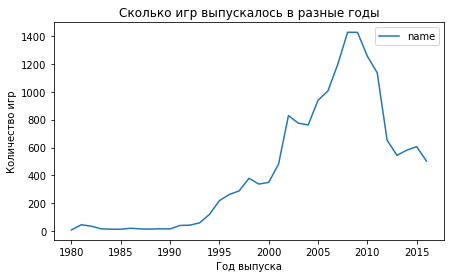

In [21]:
# визуализируем данные, сгруппировав их по году выпуска
games.groupby('year_of_release').agg({'name':'count'}).plot(figsize=(7,4))

# добавим подписи осей и название
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Сколько игр выпускалось в разные годы')
plt.legend()
plt.show()

С 1980 по начало 90-ых количество выпускаемых игр было небольшим. Мы видим, что оно начинает увеличиваться примерно с 1990 года. Видеоигры набирали популярность вместе со своей растущей аудиторией и с появлением новых игровых платформ (Nintendo, PlayStation и Xbox). Рост усилился к 2000ым также по причине развития комьютерных технологий, языков программирования и появления новых игровых движков. Сыграло роль и развитие Интернета: независимым разработчикам стало легче и дешевле создавать и продавать игры. Количество выпускаемых игр достигло своего пика приблизительно в 2007 году и оставалось на этом уровне примерно до 2009 года.

Дальше мы видим резкий спад в количестве выпускаемых игр. Сложилось несколько факторов. Во-первых, на все индустрии повлиял мировой финансовый кризис 2008 года: пришлось сократить бюджеты на разработку и выпуск игр в последующие годы. Скорее всего это привело и к обновлению стратегии разработки в целом. Во-вторых, перенасыщенность рынка игр, развитие технологий 3D и CGI привели к повышенным требованиям к разрабатываемым играм. Темп замедлился, поскольку разработчики сосредоточились на более долгосрочных и дорогих проектах, стали планировать более масштабные рекламные кампании для одной игры. В-третьих, повлиять могло и развитие Интернета, социальных сетей и распространение смартфонов: спрос на игры (и, соответственно, предложение) мог упасть в связи с появлением Instagram, YouTube и других ресурсов, которые перетянули на себя часть внимания, досугового времени и денег аудитории.

Чтобы ответить на вопрос, какой период наиболее актуален для настоящего исследования, нужно принять во внимание жизненный цикл игровых платформ и контекст развития игровой индустрии. Посмотрим, как менялись продажи по платформам.

### Динамика продаж по платформам

In [22]:
# создадим датафрейм с суммарными продажами, сгруппируя данные по платформе
sales_platforms = (games.groupby('platform').agg({'total_sales':'sum'})
                 .sort_values(by='total_sales', ascending=False))

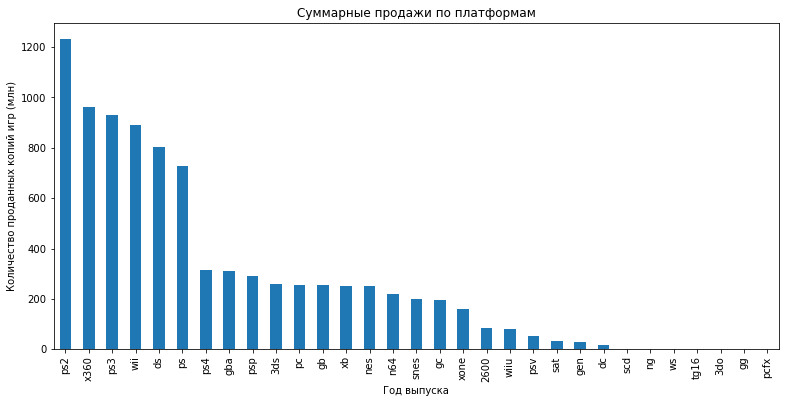

In [23]:
# визуализируем столбчатой диаграммой
sales_platforms['total_sales'].plot.bar(figsize=(13,6))

plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных копий игр (млн)')
plt.title('Суммарные продажи по платформам')
plt.show()

На графике выделается топ-6 платформ по суммарным продажам. Построим для них графики распределения продаж.

ps2:


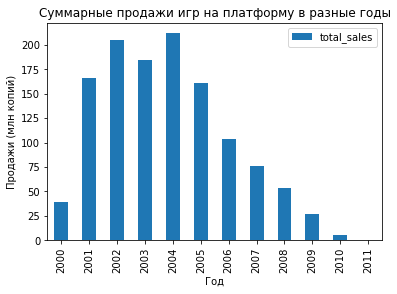

x360:


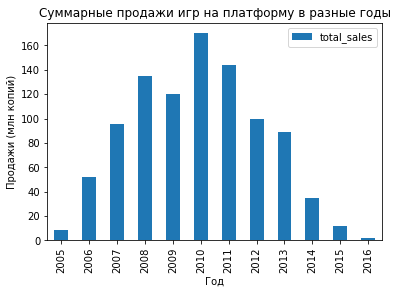

ps3:


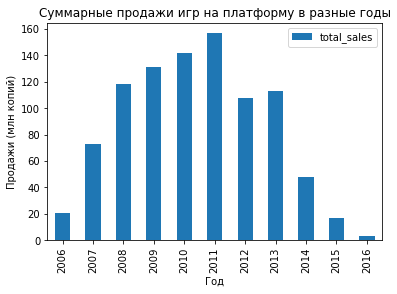

wii:


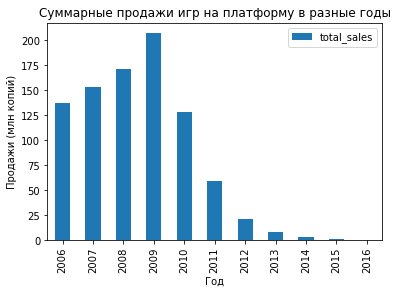

ds:


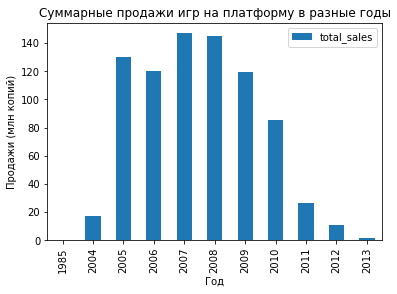

ps:


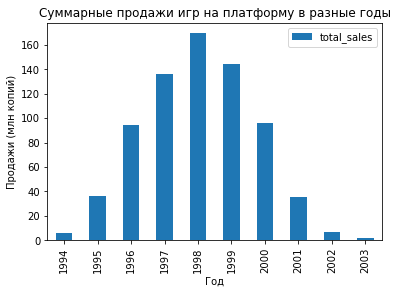

In [24]:
# пройдемся циклом по топ-6 платформам
for platform in sales_platforms.index[:6]:
    # для красоты добавим форматирование в выводе названия платформы :) 
    print('\033[1m' + platform + ':\033[0m')
    # выберем из датасета интересующие платформы
    (games.query('platform == @platform')
     # построим по ним сводные таблицы по годам и продажам
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     # и по ней построим столбчатые диаграммы
     .plot(kind='bar')
    )
    plt.xlabel('Год')
    plt.ylabel('Продажи (млн копий)')
    plt.title('Суммарные продажи игр на платформу в разные годы')
    plt.show()

- **PlayStation 2**, 2000 — 2011, ~10 лет
- **Xbox 360**: 2005 — 2016, ~11 лет
- **PlayStation 3**: 2006 — 2016, ~10 лет
- **Wii**: 2006 — 2016, ~10 лет
- **Nintendo DS**: 2004 — 2013, ~9 лет
- **PlayStation**: 1994 — 2003, ~9 лет

Округляя, можно сказать, что жизненный цикл платформы длится около 10 лет, а пик продаж приходится примерно на середину цикла (4-5 лет).

Новые игровые консоли выходят примерно каждые 5-7 лет в зависимости от производителя, а жизненный цикл консоли обычно составляет около 7-10, прежде чем производитель прекратит поддержку продукта и игры на платформу перестанут продаваться. Успешные по продажам игр консоли (как Xbox 360 или PlayStation 2) могут продержаться чуть дольше, но всё же можно остановиться на округлённом значении в 10 лет. 

### Определение актуального периода

Скорее всего в 2017 году самыми популярными окажутся игры на платформы на середине своего жизненного цикла, т.е. на те, которые выпущены до 4-5 лет назад, в 2012-2013 году. Взглянем, какие платформы выходили за последние 10 лет (полный цикл, т.е. время, раньше которого платформа уже скорее всего практически не продается). 

In [25]:
platforms_year = games.sort_values(by='year_of_release').groupby('platform').agg({'year_of_release': 'first'})
platforms_year.query('year_of_release >= 2007')

,year_of_release
platform,
3ds,2011
ps4,2013
psv,2011
wiiu,2012
xone,2013


Учтём два фактора. Во-первых, платформы достигают пика по продажам к середине цикла (~4-5 лет), во-вторых, количество выпускаемых игр снизилось и топовые разработчики с учетом снижения количества выпускаемых игр с 2010 года вкладываются скорее в качество и разрабатывают игры дольше. Таким образом, мы вполне можем предполагать, что к 2017-му году в топе окажутся игры, разработанные для платформ, вышедших ~3-4 года назад. При этом, опираясь на данные из внешних источников, мы можем утверждать, что самые горячие платформы из последних выпущенных к моменту 2016 года — это Xbox One и PS4. Посмотрим на графики, чтобы оценить динамику. 

3ds:


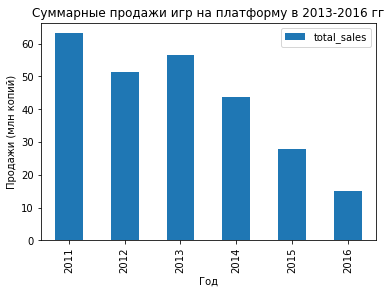

ps4:


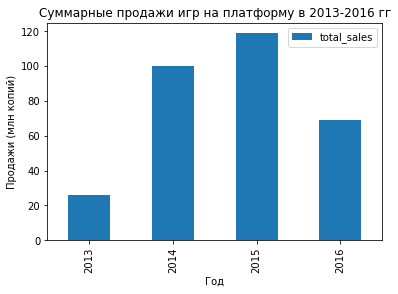

psv:


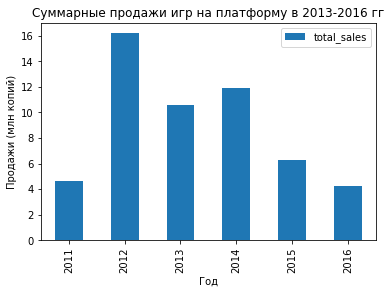

wiiu:


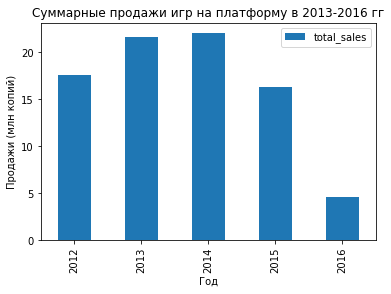

xone:


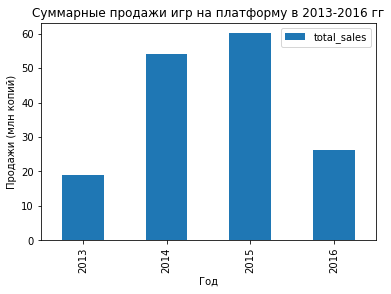

In [26]:
for platform in platforms_year.query('year_of_release >= 2007').index[:]:
    # для красоты добавим форматирование в выводе названия платформы :) 
    print('\033[1m' + platform + ':\033[0m')
    # выберем из датасета интересующие платформы
    (games.query('platform == @platform')
     # построим по ним сводные таблицы по годам и продажам
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     # и по сводным таблицам построим столбчатые диаграммы
     .plot(kind='bar')
    )
    plt.xlabel('Год')
    plt.ylabel('Продажи (млн копий)')
    plt.title('Суммарные продажи игр на платформу в 2013-2016 гг')
    plt.show()

Мы видим, что платформы, выпущенные в 2011-2012 году, показывают отрицательную динамику продаж: с 2015 года наблюдается спад. В этот список попали также портативные консоли, которые вероятно, вымещаются смартфонами. Спад на PS4 и Xbox One в 2016 обусловлен скорее всего тем, что данные по продажам за этот год еще не окончательные. Но, даже если это не так, то мы всё равно видим, что в 2015 году эти консоли показывают тренд на повышение, и это консоли нового поколения, которые с большей вероятностью будут показывать рост, чем их предшественники. Таким образом, актуальным периодом все-таки будем считать 2013-2016 гг.

In [27]:
# отфильтруем нужный период
current = games.query('year_of_release >= 2013')
current.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int32  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 218.1+ KB


В актуальный период вышло 2233 игры.

### Потенциально прибыльные платформы

Выше мы уже взглянули на динамику продаж новых консолей. Посмотрим на общую картину продаж за выделенный период.

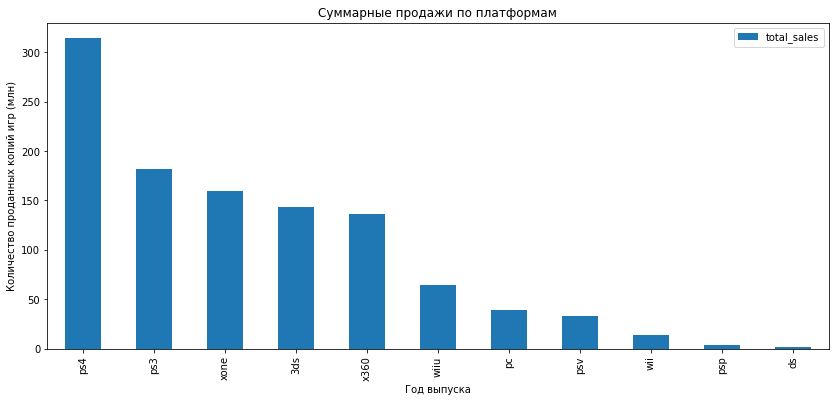

In [28]:
# сгруппируем актуальные данные по платформам
current_sales = (current.groupby('platform').agg({'total_sales':'sum'})
                 .sort_values(by='total_sales', ascending=False)).plot.bar(figsize=(14,6))

plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных копий игр (млн)')
plt.title('Суммарные продажи по платформам')
plt.show()

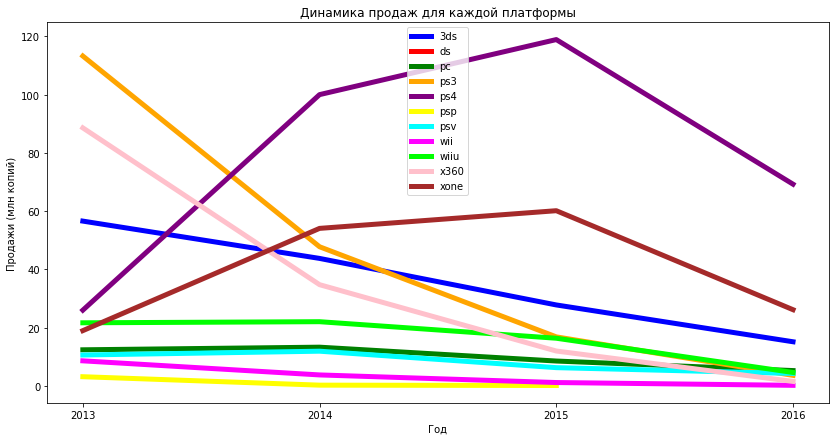

In [29]:
# создаем сводную таблицу с данными о продажах
current_sales = current.pivot_table(
    index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

# создаем график
fig, ax = plt.subplots(figsize=(14,7))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink', 'brown']

# создаем линию для каждой платформы
for i, platform in enumerate(current_sales.index):
    select = current_sales.loc[platform]
    color = colors[i]
    ax.plot(select.index, select.values, label=platform, linewidth=5, color=color)

# настраиваем отображение графика
ax.set_title('Динамика продаж для каждой платформы')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи (млн копий)')
ax.legend()

# 
ax.set_xticks(current_sales.columns)
ax.set_xticklabels(current_sales.columns.astype(int))

# отображаем график
plt.show()

На графике видно, что к моменту 2015 года растущую динамику продаж показывают две платформы: **PS4** и **Xbox One**. При этом более значительный рост у PS4. Одной из лидирующей по суммам продаж (см выше) стала PS3, однако здесь мы видим явный тренд на понижение. То же касается и Xbox 360, и 3DS. 

### Глобальные продажи по платформам в актуальный период

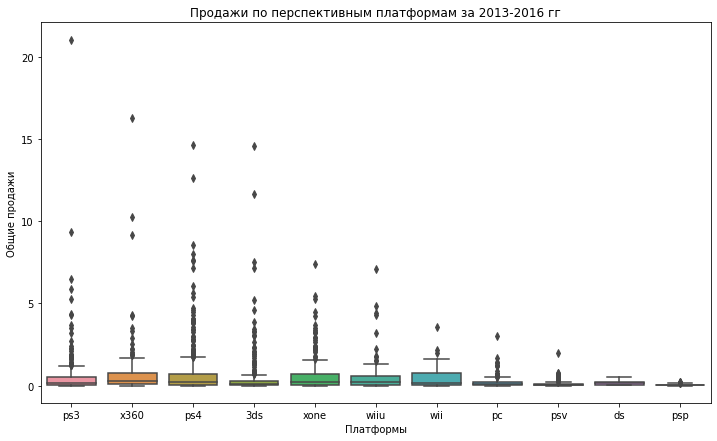

In [30]:
# построим графики «ящик с усами» для актуального периода
plt.figure(figsize=(12,7))
(sns.boxplot(data = current, y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2013-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи'))

plt.show()

Видим выбросы на больших значениях, они достаточно плотно сгруппированы. Для удобства приблизим график и посмотрим на размах.

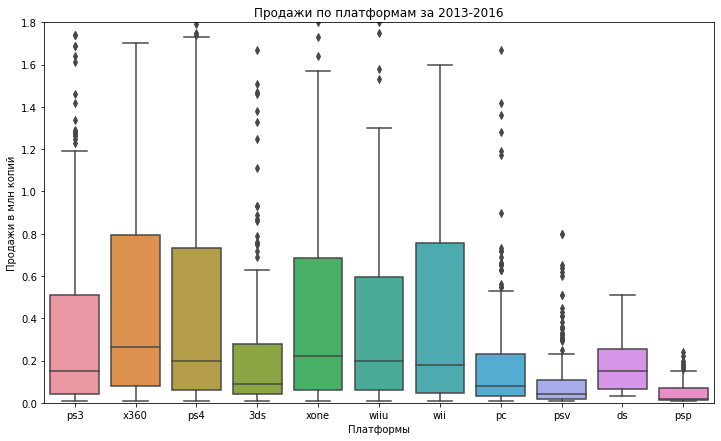

In [31]:
# построим графики «ящик с усами» для актуального периода
plt.figure(figsize=(12,7))
(sns.boxplot(data = current, y = 'total_sales', x='platform')
    .set(title = 'Продажи по платформам за 2013-2016', xlabel = 'Платформы', ylabel = 'Продажи в млн копий', ylim=(0,1.8)))

plt.show()

Медианные продажи у лидирующих платформ находятся в диапазоне ~ 0.2-0.25, а межквартильный размах ~ 0.5-0.7. Нормальный диапазон высокий значений определяется для PS4 до ~ 1.75, чуть меньше для Xbox360 (~ 1.7), для Xbox One до ~ 1.6, на том же уровне — Wii (~ 1.6). Размах и верхние границы нормальных значений WiiU и PS3 чуть ниже, чем у топов. Визуально заметно, что по всем показателям проигрывают 3DS, PC, PSV, DS и PSP (меньше всего продаж).

Мы можем сделать вывод, что более успешными платформами по продажам игр скорее всего станут домашние консоли от топовых производителей Sony, Microsoft и Nintendo.

### Влияние оценок на продажи 

Рассмотрим влияние оценок на продажи одной из популярных платформ. Возьмем PS4, так как она одна из новых и, судя по графикам, успешнее, чем Xbox One. 

In [32]:
# выделим данные по PS4
ps4 = current.query('platform == "ps4"')

#### Оценка критиков

In [33]:
# напишем функцию 
def correlation(df, column):
    # которая построит график рассеяния
    df.plot(x=column, y='total_sales', kind='scatter', grid=True, alpha=0.6, figsize=(8,5))
    plt.xlabel('Оценка')
    plt.ylabel('Общие продажи')
    plt.title('Корреляция между оценкой и общими продажами')
    plt.show()
    # рассчитает коэффициент корреляции
    print('\033[1mКоэффициент корреляции:\033[0m', df[column].corr(df['total_sales']))

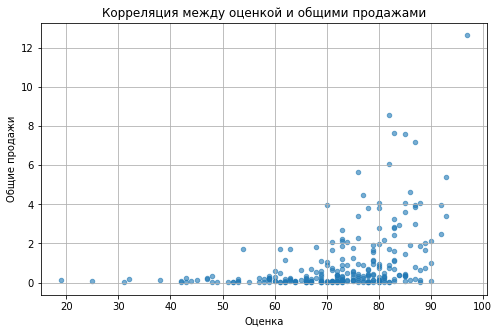

Коэффициент корреляции: 0.40656790206178123


In [34]:
# применим написанную функцию к созданному датафрейму и выберем нужный столбец 
correlation(ps4,'critic_score')

Есть слабая положительная корреляция между оценкой критиков и продажами, то есть с увеличением оценки незначительно увеличиваются и продажи. Связь слабая, поскольку продажи игр зависят от многих других факторов, включая маркетинг, репутацию разработчика, наличие свежих конкурентных игр и прочего. А также вероятно, что пользователи покупают игры вне зависимости от отзывов, потому что, как мы видели выше, разработчики стали выпускать меньше игр, а пользователя равно интересует разнообразие и возможность попробовать новое. Кроме того, разные критики оценивают игры с точки зрения разных критериев, и их оценка может не совпадать с ожиданиями пользователя: следовательно, доверие к их оценке падает. 

#### Оценка пользователей

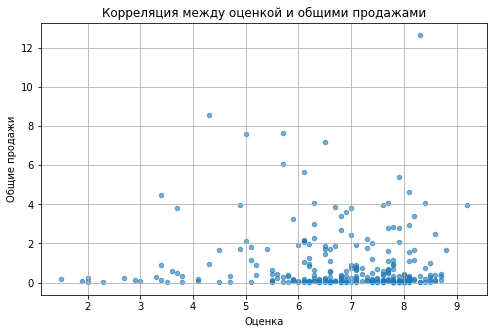

Коэффициент корреляции: -0.03195711020455644


In [35]:
correlation(ps4,'user_score')

Между пользовательской оценкой и уровнем продаж отсутствует корреляция. Выше мы уже упоминали причины, по которым связь продаж с оценкой критиков слабая. Здесь они также актуальны. При этом пользовательская оценка не воспринимается как нечто объективное, поэтому не влияет на принятие решения о покупке. Стоит также добавить, что в исследуемый период уже стали популярны обзоры и прохождения игр в социальных сетях и новых медиа: по ним пользователь сам оценивает, стоит ли ему покупать игру, не полагаясь на мнения других.

#### Соотнесение с другими платформами

Скорее всего, такой же результат мы будем наблюдать и для других современных платформ в актуальном периоде, поскольку это универсальные тенденции. Взглянем для примера на корреляцию для Xbox One.

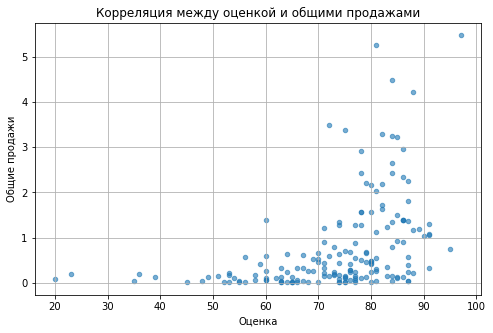

Коэффициент корреляции: 0.41699832800840153


In [36]:
xone = current.query('platform == "xone"')
correlation(xone,'critic_score')

Так же видим слабую положительную корреляцию между оценкой критиков и продажами.

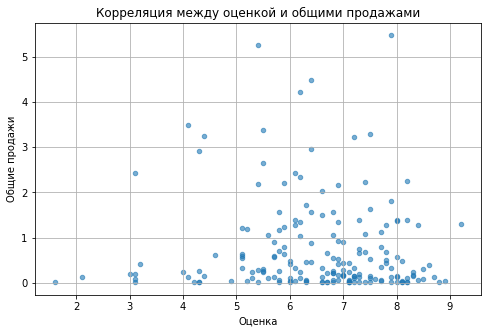

Коэффициент корреляции: -0.06892505328279418


In [37]:
correlation(xone,'user_score')

Так же отсутствует корреляция между оценкой пользователей и продажами.

Отзывы и оценки других пользователей или критиков скорее всего имели большее значение для более старых платформ, поскольку инфополе вокруг выпускаемой игры не было перенасыщенно и не было возможности увидеть подробный обзор на игру. Ради интереса убедимся в этом, выведя данные по корреляции продаж и пользовательских оценок по первой PlayStation.

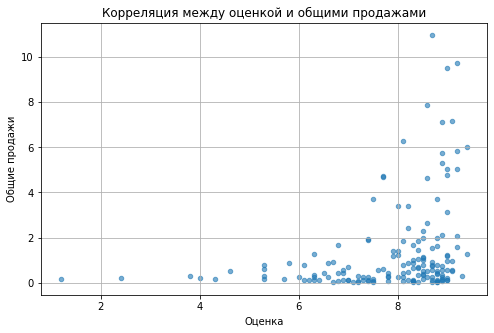

Коэффициент корреляции: 0.3000775353440939


In [38]:
ps = games.query('platform == "ps"')
correlation(ps,'user_score')

Действительно, коэффициент корреляции подрос, здесь уже есть слабая положительная связь, которая видна и на графике. Чтобы убедиться в правильности сделанных выводов, посчитаем корреляции для других платформ.

In [39]:
# напишем функцию для расчета всех корреляций, которая принимает на вход столбец с нужной оценкой
def score_corr (column):
    # создаем пустой DataFrame с колонками для названия платформы и коэффициента корреляции
    df = games.dropna(subset=[column])
    corr_df = pd.DataFrame(columns=['platform', 'correlation'])

    # проходим по каждой платформе и рассчитываем коэффициент корреляции
    for platform in df['platform'].unique():
        p = df.query('platform == @platform')
        corr_coef = p[column].corr(p['total_sales'])
        # добавляем название платформы и коэффициент корреляции в DataFrame
        corr_df = corr_df.append({'platform': platform, 'correlation': corr_coef}, ignore_index=True)
    # выводим таблицу с коэффициентами корреляции для каждой платформы
    return corr_df

In [40]:
user = score_corr('user_score')
critic = score_corr('critic_score')
both = user.merge(critic,on='platform')
both.columns=['Платформа', 'Пользователи', 'Критики']
print('\033[1mКорреляция продаж по платформам с оценками пользователей и критиков\033[0m')
both.sort_values('Пользователи')

Корреляция продаж по платформам с оценками пользователей и критиков


,Платформа,Пользователи,Критики
16,dc,-0.303399,0.350127
14,xone,-0.068925,0.416998
6,ps4,-0.031957,0.406568
9,pc,0.012905,0.257395
15,psv,0.013489,0.131763
13,gba,0.106149,0.242107
0,wii,0.112831,0.177907
2,x360,0.114187,0.392866
3,ps3,0.128416,0.432759
1,ds,0.130876,0.237546


Мы видим, что в целом наш вывод применим ко всем платформам с небольшими погрешностями. Связь продаж с оценками критиков варьируется от очень слабой до слабой положительной. А с пользовательскими оценками добавляется несколько платформ, у которых есть слабая отрицательная связь (DC), очень слабая положительная (GC, PSP, 3DS), слабая положительная (PS, WiiU).

Итак, будем считать, что продажи игр в актуальном периоде слабо связаны с оценками критиков и практически не связаны с пользовательскими оценками.

### Распределение продаж по жанрам

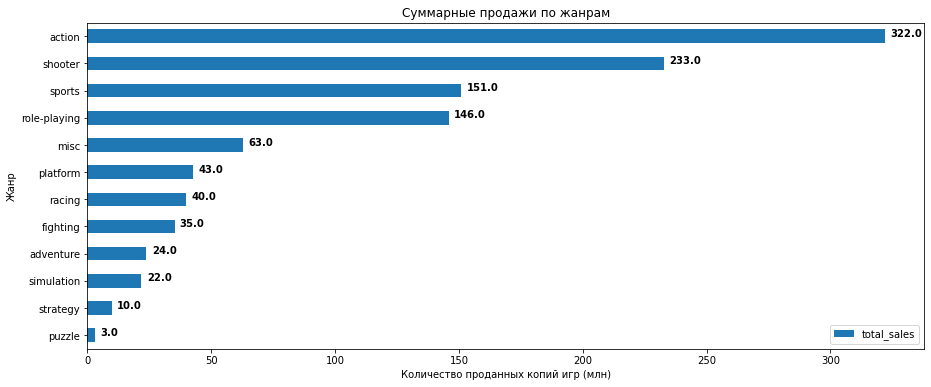

In [41]:
# сгруппируем актуальные данные по жанрам
genre_sales = (current.groupby('genre').agg({'total_sales':'sum'})
                 .sort_values(by='total_sales', ascending=True))

# построим график
ax = genre_sales.plot.barh(figsize=(15,6))

# добавим подписи количества для каждой платформы
for i, v in enumerate(genre_sales['total_sales'].round()):
    plt.text(v + 2, i, str(v), color='black', fontweight='bold')

# добавим подписи к осям и заголовок
plt.xlabel('Количество проданных копий игр (млн)')
plt.ylabel('Жанр')
plt.title('Суммарные продажи по жанрам')
plt.show()

**Продаваемые игры**. В актуальном периоде игры жанра экшен очевидно лидируют по продажам (~ 322 млн), с ощутимым отрывом дальше идут шутеры (~233 млн). Можно сказать, что условное третье место по продажам поделили ролевые игры и игры жанра спорт (151 и 146 млн). **Игры с низкими продажами**. Меньше всего продаж собрали стратегии (10 млн) и пазлы (3 млн).  

action:


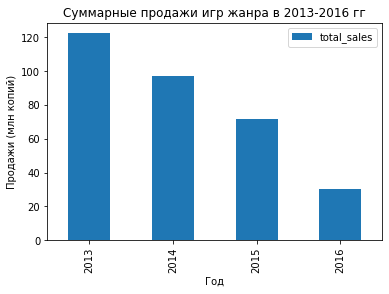

shooter:


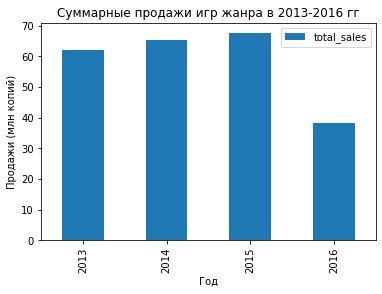

sports:


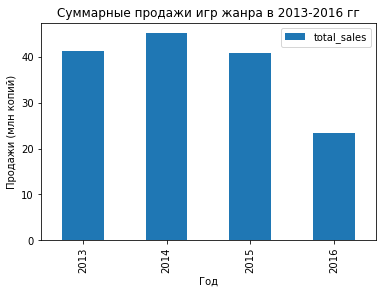

role-playing:


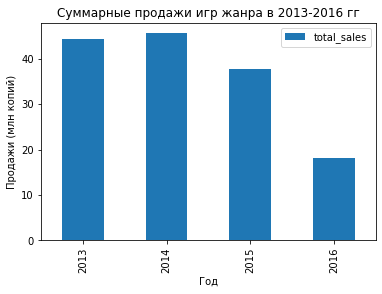

In [42]:
# проходимся циклом по самым популярным жанрам, которые мы забираем из индексов созданного выше датафрейма
for genre in genre_sales.index[-1:-5:-1].tolist():
    # для красоты добавим форматирование в выводе названия платформы :) 
    print('\033[1m' + genre + ':\033[0m')
    # выберем из датасета интересующие платформы
    (current.query('genre == @genre')
     # построим по ним сводные таблицы по годам и продажам
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     # и по ней построим столбчатые диаграммы
     .plot(kind='bar')
    )
    plt.xlabel('Год')
    plt.ylabel('Продажи (млн копий)')
    plt.title('Суммарные продажи игр жанра в 2013-2016 гг')
    plt.show()    

Поскольку данные за 2016 год не полные, так же обращаем внимание на динамику до 2015 года. При больших суммарных продажах на графике мы видим, что динамика продаж игр *action* плавно снижается. Для выделения наиболее прибыльного жанра посмотрим медианные продажи.

In [43]:
# сгруппируем данные по жанру и получим статистические показатели
genre_sales_desc = current.groupby('genre')['total_sales'].describe()

# создадим таблицу из статистических показателей
genre_table = pd.concat([genre_sales_desc['count'], 
                   genre_sales_desc['mean'].round(2), 
                   genre_sales_desc['std'].round(2), 
                   genre_sales_desc['50%'], 
                   genre_sales_desc['max']], 
                  axis=1).reset_index()

# переименуем столбцы
genre_table.columns = ['Жанр', 'Количество', 'Среднее', 'Отклонение', 'Медиана', 'Максимум']

# выведем таблицу
genre_table = genre_table.sort_values('Медиана',ascending=False)
genre_table

,Жанр,Количество,Среднее,Отклонение,Медиана,Максимум
8,shooter,187.0,1.25,2.01,0.450,14.63
10,sports,214.0,0.70,1.22,0.240,8.58
4,platform,74.0,0.58,0.81,0.225,4.32
7,role-playing,292.0,0.50,1.35,0.125,14.60
2,fighting,80.0,0.44,1.05,0.125,7.55
6,racing,85.0,0.47,0.96,0.120,7.09
0,action,766.0,0.42,1.25,0.110,21.05
9,simulation,62.0,0.35,0.85,0.100,5.22
3,misc,155.0,0.41,1.01,0.100,9.18
11,strategy,56.0,0.18,0.28,0.080,1.67


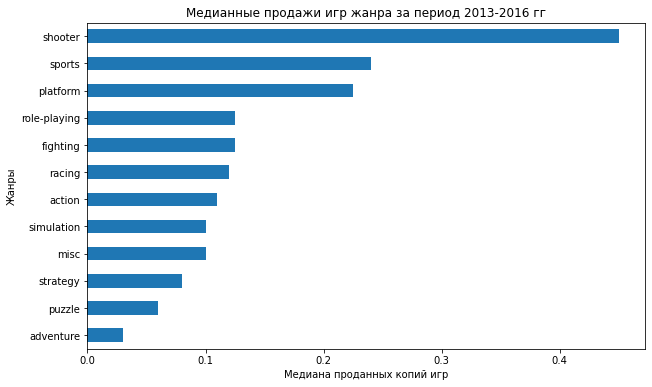

In [44]:
current.groupby('genre')['total_sales'].median().sort_values().plot.barh(figsize=(10,6))
plt.xlabel('Медиана проданных копий игр')
plt.ylabel('Жанры')
plt.title('Медианные продажи игр жанра за период 2013-2016 гг')
plt.show()

В выделенном периоде по медианным продажам игр лидирует жанр *shooter*. В Топ-3 так же вошли игры жанра *sports* и *platform*. 

shooter:


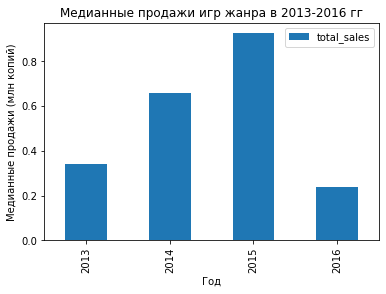

sports:


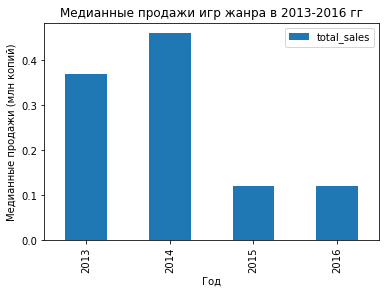

platform:


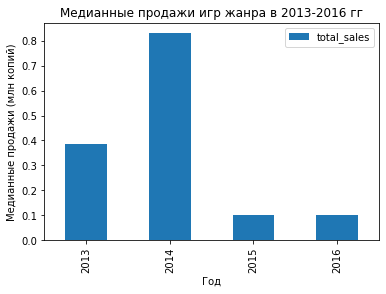

role-playing:


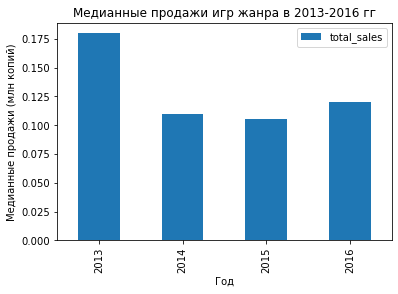

fighting:


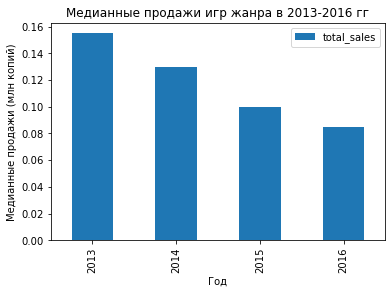

In [45]:
# проходимся циклом по жанрам
for genre in genre_table['Жанр'].head().tolist():
    # для красоты добавим форматирование в выводе названия платформы :) 
    print('\033[1m' + genre + ':\033[0m')
    # выберем из датасета интересующие платформы
    (current.query('genre == @genre')
     # построим по ним сводные таблицы по годам и продажам
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='median')
     # и по ней построим столбчатые диаграммы
     .plot(kind='bar')
    )
    plt.xlabel('Год')
    plt.ylabel('Медианные продажи (млн копий)')
    plt.title('Медианные продажи игр жанра в 2013-2016 гг')
    plt.show() 

Положительную динамику продаж к 2015 году показывают только шутеры. Немного расширим период для визуализации, чтобы увидеть более широкие тренды относительно продаж по жанрам.

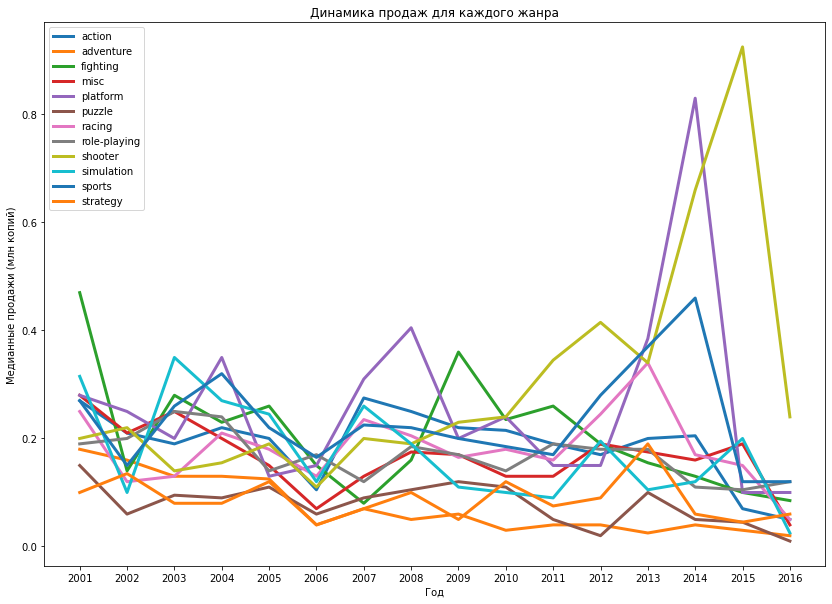

In [46]:
# создаем сводную таблицу с данными о продажах
genre_wider = games.query('year_of_release > 2000').pivot_table(
    index='genre', columns='year_of_release', values='total_sales', aggfunc='median')

# создаем график
fig, ax = plt.subplots(figsize=(14,10))

# создаем линию для каждой платформы
for genre in genre_wider.index:
    # получаем данные для текущей платформы
    select = genre_wider.loc[genre]
    # создаем линию
    ax.plot(select.index, select.values, label=genre, linewidth=3)

# настраиваем отображение графика
ax.set_title('Динамика продаж для каждого жанра')
ax.set_xlabel('Год')
ax.set_ylabel('Медианные продажи (млн копий)')
ax.legend()

ax.set_xticks(genre_wider.columns)
ax.set_xticklabels(genre_wider.columns.astype(int))

# отображаем график
plt.show()

На графике видно, что некоторые игры уже на протяжении долгого времени стабильно показывают относительно низкие продажи: это жанры *adventure*, *strategy*, *puzzle*. С остальными играми ситуация сложнее: они переживают то взлёты, то падения. В период с 2009 года в топах оказывались попеременно *fighting, sports, platform* и *shooter*. При этом мы видим, что шутеры стабильно показывают высокие продажи с 2010 года, в то время как продажи платформеров резко увеличились на короткий промежуток времени и так же резко упали к 2015 году. Можем сделать вывод, что жанр *shooter* скорее всего покажет высокие продажи и в 2017 году. Однако с учётом в целом довольно резких скачков в продажах жанров, вероятно и снижение продаж шутеров относительно уровня 2015-2016 гг. 

### Вывод по исследовательскому анализу 

Мы определили, что количество выпускаемых игр стало снижаться приблизительно с 2010 года. За всё время больше всего копий игр было продано на PlayStation 2. Также в топ-6 вошли: Xbox 360, PlayStation 3, Nintendo Wii и DS. На их примере мы определили жизненный цикл одной игры — около 10 лет, а пик продаж приходится на середину жизненного цикла.

С учётом пика продаж игр на платформу на 4-5 год её существования, а также общим состоянием рынка было принято решение актуальным периодом для исследования считать 2013-2016 гг.

Самыми перспективными платформами с точки зрения динамики продаж являются PS4 и Xbox One, однако в выделенном периоде высокие суммарные продажи показывают всё еще и их предшественники от того же производителя, а также приставки Nintendo. Можем предполагать, что новые модели сменят старые и в суммарных продажах будут стремиться к их показателям в своём цикле.

Мы также выяснили, что оценки критиков оказывают слабое влияние на продажи, а с оценками пользователей связь совсем отсутствует. Этому фактору продаж особое внимание уделять не стоит.

На уровень продаж влияет жанр игры. Популярный жанр в актуальный период — шутеры (shooter). Стабильно низкие продажи у головоломок (puzzle) и приключенческих игр (adventure). 

## Портрет пользователя каждого региона

In [47]:
# для удобства сразу составим список регионов
regions = current.columns[4:7].tolist()

In [48]:
# напишем функцию, которая будет принимать на вход название графиков и исследуемый параметр
def portrait(title,param):
    # будем строить несколько графиков в ряд
    fig, axs = plt.subplots(1, 3, figsize=(16,6))
    # зададим общий заголовок
    fig.suptitle(title, fontsize=18)
    # теперь циклом будем проходиться по регионам (список мы составили выше, а здесь добавили индексы)
    for i, region in enumerate(regions):
        param_sales = current.groupby(param)[region].sum()
        # выбираем топ-5 по продажам
        top_param = param_sales.nlargest(5).reset_index()
        # для того, что не вошло в топ-5, создаем категорию other (другие)
        other_sales = param_sales.sum() - top_param[region].sum()
        # добавим условие, что другие продажи больше 0, чтобы потом на графике не было полоски с 0% 
        if other_sales > 0.0001:
        # добавляем эту категорию к нашему датафрейму для графика
            top_param = top_param.append({param: 'other', region: other_sales}, ignore_index=True)
        # наконец, строим круговую диаграмму с нужными параметрами форматирования и пр.
        top_param.plot(kind='pie', y=region, labels=top_param[param],
                       autopct='%1.1f%%', legend=False, ax=axs[i])
        # задаем название для каждой диаграммы
        axs[i].set_title(region)
    return plt.show()

### Самые популярные платформы

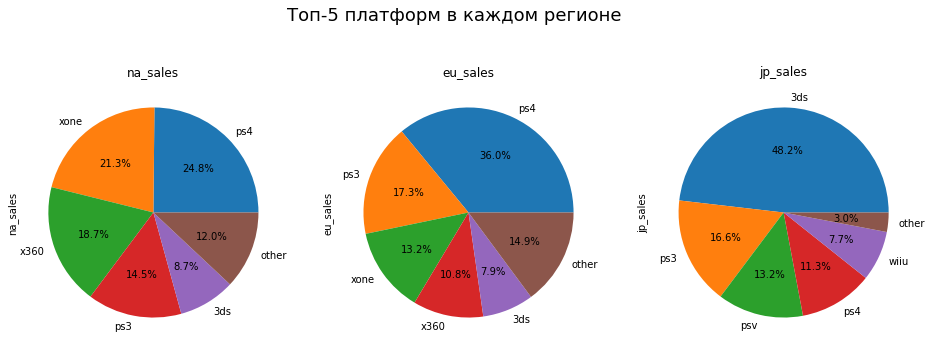

In [49]:
# применяем написанную функцию к платформам
portrait('Топ-5 платформ в каждом регионе','platform')

В **Северной Америке** доля продаж игр на PlayStation 4 (~ 25%) немного больше, чем на Xbox One (~ 21%) и Xbox 360 (~ 19%). PS3 также занимает значительную долю продаж (~ 14%), 3DS от Nintendo закрывает топ-5 с долей ~ 9%. Доля всех остальных платформ — 12%. Суммарно между собой практически поровну делят продажи два последних поколения консолей от Sony и Microsoft. 

В **Европе** более явно лидирует PS4 с долей 36%. На втором месте PS3 (~ 17%). Суммарно продажи приставок от Sony составляют больше половины всех продаж. Здесь XOne (~ 13%) и X360 (~ 11%) явно уступают. 3DS занимает примерно такую же небольшую долю продаж, как и в Северной Америке. Доля всех остальных платформ — 15%. 

В **Японии** рынок выглядит несколько иначе. В то время как в Европе и Америке мы видим, что приставка 3DS находится в конце топа-5, здесь у нее почти половина всех продаж (~ 48%). При этом приставки от Microsoft даже не вошли в топ-5: японский рынок поделили игры для консолей от японских производителей. На втором месте PS3 (~ 17%), PSV (~ 13%) и PS4 (11%). В отличие от других регионов в топ вошла приставка WiiU (~ 8%).

### Самые популярные жанры 

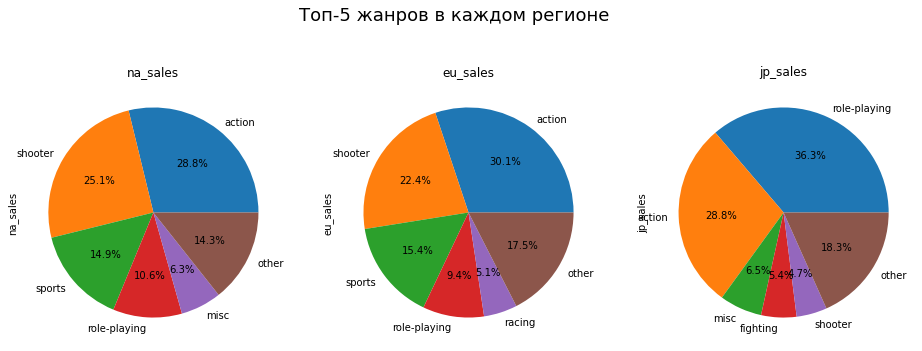

In [50]:
# применяем написанную функцию к жанрам
portrait('Топ-5 жанров в каждом регионе','genre')

Мы видим, что продажи по жанрам в **Северной Америке** и **Европе** очень похожи между собой. Больше всего продаж игр жанра action (~ 28-30%), shooter (~ 22-25%), sports(~ 14-15%), role-playing (~ 9-11%). В топ Северной Америки вошли игры жанра misc (~ 6%), а в Европе — racing (~ 5%). В целом, планируя кампании в этих двух регионах, можно ориентироваться на тенденции по жанрам, которые мы выявили выше на предыдущем этапе исследования.

В **Японии** снова отличия. Первое место в топе продаж — у игр role_playing (~ 36%), чуть больше трети рынка. Чуть меньше трети у игр action (~ 29%). Остальные места поделили между собой в пределах ~ 5-7% игры misc, fighting, shooter.

Различия могут быть обусловлены многими факторами: здесь нужно углубляться в особенности жанров и социально-культурные особенности регионов. На данный момент сделаем вывод, что при планировании кампаний для Европы и Северной Америки можно делать ставку на экшен и шутеры, а в Японии делать больший акцент на ролевые игры. 

Доля остальных жанров на всех трех рынках сопоставимая (~ 14-18%).

### Влияние рейтинга ESRB

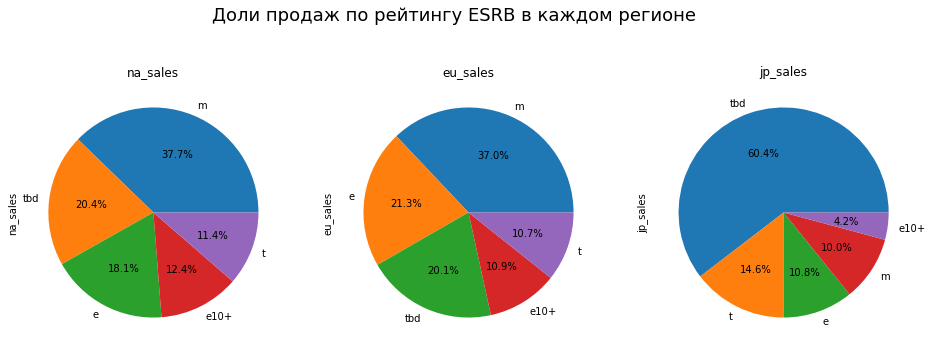

In [51]:
# применяем написанную функцию к рейтингу
portrait('Доли продаж по рейтингу ESRB в каждом регионе','rating')

Снова видим приблизительно похожую картину для **Северной Америки** и **Европы** с незначительными расхождениями. Больше всего продаются игры с рейтингом 'm' (от 17 лет, ~ 37-38%). Следующее место в топе занимают игры с рейтингом 'e' (для всех, ~ 18-20 %), если не считать около 20% игр, у которых рейтинг не определен ('tbd'). И оставшиеся доли почти поровну (~ 10-12%) делят между собой игры для детей от 10 лет ('e10+') и подростков ('t'). 

В **Японии** же в топе продаж находятся игры без определенного рейтинга (~ 60%), затем ~ 14% у игр для подростков, по 10-11% у игр для всех и для взрослых от 17 лет, меньше всего (и меньше чем в Европе и Америке) продаж игр для детей от 10 лет (~ 4%).

Различия могут быть связаны с тем, что игры, продающиеся на японском рынке, оцениваются по другой рейтинговой системе CERO, которая и влияет на продажи игр в этом регионе (и по которой оцениваются игры, выходящие эксклюзивно для японского рынка, чем может быть обусловлено большое количество пропусков здесь). 

### Выводы

Выше мы произвели более полное и подробное исследование предпочтений пользователей в разных регионах, а теперь сделаем вывод о портретах, ориентируясь только на показатели топ-1. В кампании акцент можно сделать на следующих пользователей:

**Северная Америка.** Пользователь от 17 лет, который предпочитает игры экшен на PlayStation 4. <br/>
**Европа.** Пользователь от 17 лет, который предпочитает игры экшен на PlayStation 4. <br/>
**Япония.** Пользователь от 13 лет, который играет в ролевые игры и носит с собой портативную приставку. <br/>

## Проверка гипотез

На этом шаге мы будем проверять гипотезы относительно пользовательских рейтингов. В столбце `user_score` и `critic_score` мы выявили и оставили значительную долю пропущенных значений, поэтому сперва данные нужно будет от них очистить.

Нулевую гипотезу будем формулировать как утверждение о равенстве сравниваемых показателей, а альтернативную — об их различии. Посмотрим на различие средних по данной выборке, а затем проверим статистическую значимость. Будем использовать метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: `scipy.stats.ttest_ind(array1, array2, equal_var, alternative)`. Дополнительно посчитаем размеры выборок и дисперсии, чтобы оценить, как настроить параметр `equal_var`. Параметр `alternative` оставим по умолчанию 'two-sided', поскольку проверяем двусторонние гипотезы. 

### Рейтинги платформ Xbox One и PC

**Нулевая гипотеза**: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. <br/>
**Альтернативная гипотеза**: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [52]:
# выберем данные по интересующим платформам, уберем из расчетов строки с пропусками, выберем столбец user_score
xone = current.query('platform == "xone" and user_score.isna()==False')['user_score']
pc = current.query('platform == "pc" and user_score.isna()==False')['user_score']
print('Размер выборки по Xbox One:', xone.count())
print('Размер выборки по PC:', pc.count())

Размер выборки по Xbox One: 182
Размер выборки по PC: 155


In [53]:
# посмотрим, какие данные представлены в столбце user_score и выведем разницу
stats = pd.concat([xone.describe(),pc.describe()], axis=1).round(2)
stats.columns = ['Xbox One', 'PC']
display(stats)
print('Разница в среднем пользовательском рейтинге:', xone.mean() - pc.mean())
print('Дисперсия по Xbox One:', np.var(xone, ddof=1))
print('Дисперсия по PC:', np.var(pc, ddof=1))

,Xbox One,PC
count,182.00,155.00
mean,6.52,6.27
std,1.38,1.74
min,1.60,1.40
25%,5.80,5.30
50%,6.80,6.80
75%,7.50,7.60
max,9.20,9.30


Разница в среднем пользовательском рейтинге: 0.25175115207373366
Дисперсия по Xbox One: 1.9069968429360702
Дисперсия по PC: 3.035892752408884


Мы видим, что разница в среднем пользовательском рейтинге этих двух платформ минимальная, а медианные значения совпадают. Значения дисперсии различаются, однако при сопоставимом размере выборок это не должно повлиять на тестирование.

In [54]:
# проведем ttest для двух выборок
results = st.ttest_ind(xone, pc)
print('p-значение:', results.pvalue)

# задачем уровень статистической значимости 5%
alpha = 0.05
# если p-value окажется меньше него, отвергнем гипотезу

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Нет оснований отвергать нулевую гипотезу, поэтому можно считать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Рейтинги жанров Action и Sports 

**Нулевая гипотеза**: средние пользовательские рейтинги жанров Action и Sports одинаковые. <br/>
**Альтернативная гипотеза**: средние пользовательские рейтинги жанров Action и Sports разные.

In [55]:
# выберем данные по интересующим платформам, уберем из расчетов строки с пропусками, выберем столбец user_score
action = current.query('genre == "action" and user_score.isna()==False')['user_score']
sports = current.query('genre == "sports" and user_score.isna()==False')['user_score']
print('Размер выборки по Action:', action.count())
print('Размер выборки по Sports:', sports.count())

Размер выборки по Action: 389
Размер выборки по Sports: 160


In [56]:
# посмотрим, какие данные представлены в столбце user_score и выведем разницу
stats1 = pd.concat([action.describe(),sports.describe()], axis=1).round(2)
stats1.columns = ['Sports', 'Action']
display(stats1)
print('Разница в среднем пользовательском рейтинге:', action.mean() - sports.mean())
print('Дисперсия по жанру Action:', np.var(action, ddof=1))
print('Дисперсия по жанру Sports:', np.var(sports, ddof=1))

,Sports,Action
count,389.00,160.00
mean,6.84,5.24
std,1.33,1.78
min,2.00,0.20
25%,6.30,4.10
50%,7.10,5.50
75%,7.80,6.50
max,9.10,8.80


Разница в среднем пользовательском рейтинге: 1.599407133676098
Дисперсия по жанру Action: 1.76936090424827
Дисперсия по жанру Sports: 3.1806128144654062


Мы видим, что разница в среднем пользовательском рейтинге этих жанров уже ощутимая относительно разницы для двух платформ, которые мы сравнивали выше. Дисперсии отличаются и при этом отличается размер выборок: данных по action примерно в два раза больше. Учтём это в тестировании. 

In [57]:
# проведем ttest для двух выборок
results1 = st.ttest_ind(action, sports, equal_var=False)
print('p-значение:', results1.pvalue)

# задачем уровень статистической значимости 5%
alpha = 0.05
# если p-value окажется меньше него, отвергнем гипотезу

if results1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Есть основания отвергнуть нулевую гипотезу, следовательно, можем говорить, что средние пользовательские рейтинги жанров Action и Sports различаются. 

## Выводы

В ходе работы проделаны следующие шаги: 

- знакомство с данными;
- предобработка данных: проверка и обработка пропущенных, аномальных и некорректных значений, дубликатов, регистров строк и добавление нужного столбца с общими продажами;
- исследовательский анализ, в ходе которого были определены актуальные данные и некоторые тенденции;
- определение портретов пользователей для крупных регионов продаж;
- проверка гипотез.

Удалось выяснить, что на успешность продаж игры больше всего играет **платформа**, для которой она разработана, и её **жанр**.

Теперь немного подробнее. Чтобы спрогнозировать, какие игры могут оказаться популярными в 2017 году и на что рекомендуется делать акцент в рекламной компании, мы использовали данные за **2013-2016 гг**. Такой период был определен с учётом замедления выпуска новых игр с 2010 года и по актуальным платформам на рынке, пик продаж которых по «жизненному циклу» приходится на 4-5 год спустя релиза. 

**Топовые производители**. Мы выяснили, что самыми перспективными являются консоли от топовых производителей: Sony, Microsoft и Nintendo. Модели последнего поколения показывают положительную динамику продаж, быстро перегоняя своих предшественников. При этом более старые модели всё еще собирают большие суммарные продажи в актуальном периоде. Ставку в 2017 году рекомендуется делать на новые домашние консоли: PlayStation 4 и Xbox One. К этому моменту топовые разработчики успеют выпустить игры, которые смогут стать хитами продаж.

**Оценки**. Не стоит уделять особое внимание пользовательским оценкам и оценкам критиков. Как показало исследование, они оказывают незначительное влияние на продажи, особенно в актуальном периоде.

**Жанр**. Важнее учесть жанр игры. Стабильно низкие продажи у головоломок и приключенческих игр. При этом шутеры в актуальном периоде показывают высокие медианные продажи и скорее всего останутся популярными и в 2017 году. 

**Региональные рынки**. При планировании кампании следует учитывать особенности рынка в разных регионах. В Северной Америке и Европе портрет пользователя схож и повторяются общие тенденции, описанные выше. На основании анализа рейтинга ESRB можно сделать вывод, что популярностью пользуются игры M (mature, от 17 лет) и игры E (everyone, для всех). 

При работе на японском рынке стоит учитывать некоторые особенности. В Японии не пользуются популярностью американские консоли Xbox, популярны портативные приставки, ценятся ролевые игры и есть своя рейтинговая система. Сравнивая данные по играм, у которых присвоен рейтинг ESRB, можно сказать, что здесь более популярны игры для подростков (T).

**А также.** Дополнительно мы выяснили, что средние пользовательские рейтинги платформ Xbox One и PC, скорее всего, одинаковые, а у жанров Action и Sports — разные.